# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle. The original dataset contained information on 3 million used cars. The provided dataset contains information on 426K cars to ensure speed of processing.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

1. Business Understanding Phase:
Identify the requirements and constraints of the used car dealership.
The goal is to build a predictive model that can estimate the price of a used car based on its characteristics, such as 'year', 'manufacturer', 'model', 'condition', 'cylinders', 'fuel', 'odometer', 'transmission', 'drive', 'size', 'type', 'paint_color', and 'state

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

In [2]:
import pandas as pd

df = pd.read_csv('vehicles.csv')

In [5]:
df.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [3]:
df_new=df[(df['price']> 200000) & (df['price']< 400000)]

array([[<Axes: title={'center': 'id'}>,
        <Axes: title={'center': 'price'}>],
       [<Axes: title={'center': 'year'}>,
        <Axes: title={'center': 'odometer'}>]], dtype=object)

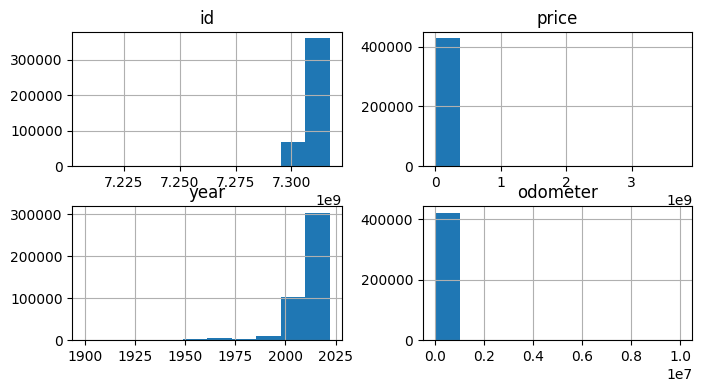

In [7]:
df.hist(figsize=(8,4))

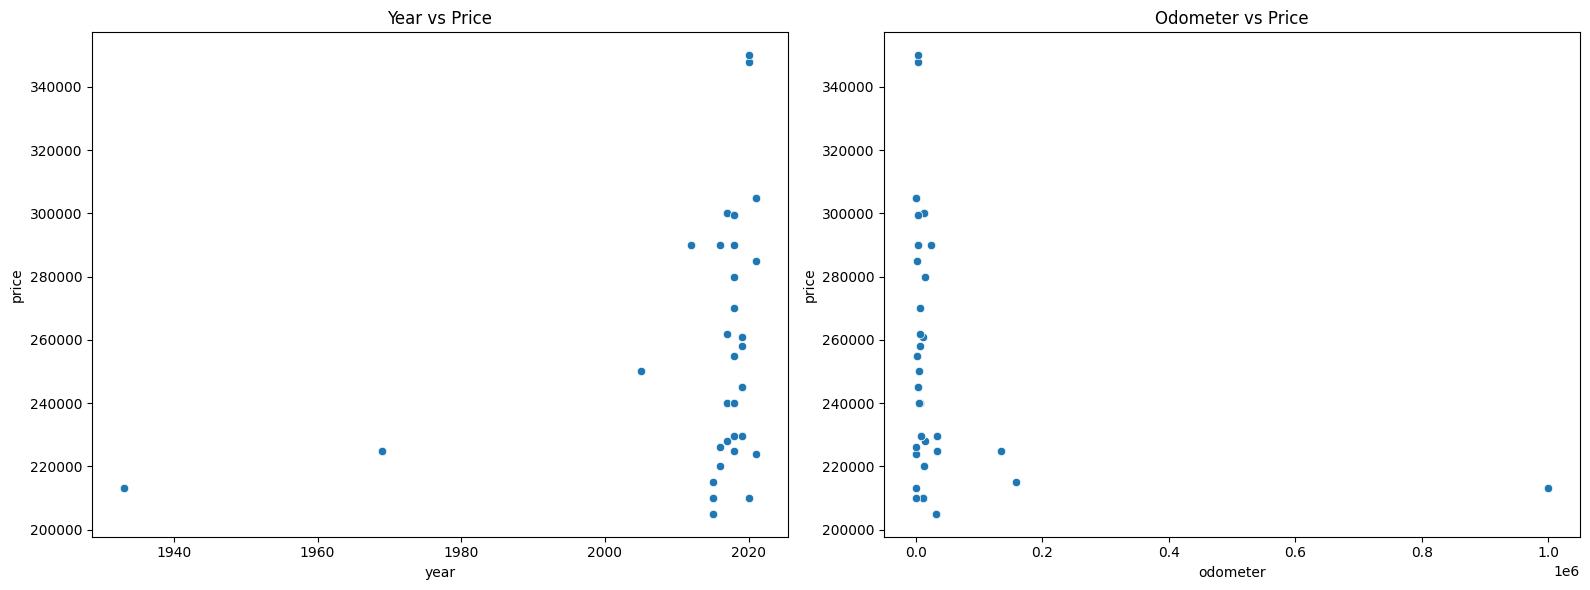

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16, 6))

# Scatter plot for 'year' vs 'price'
plt.subplot(1, 2, 1)
sns.scatterplot(x='year', y='price', data=df_new)
plt.title('Year vs Price')

# Scatter plot for 'odometer' vs 'price'
plt.subplot(1, 2, 2)
sns.scatterplot(x='odometer', y='price', data=df_new)
plt.title('Odometer vs Price')

plt.tight_layout()
plt.show()

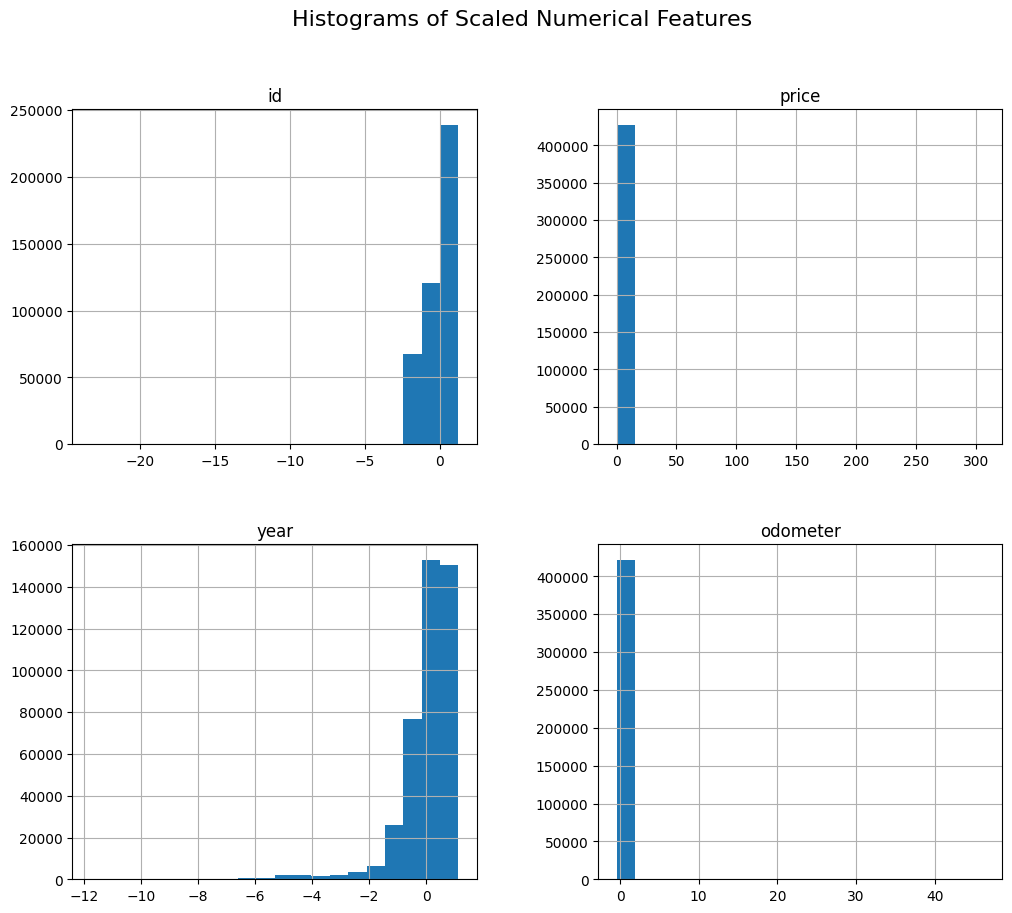

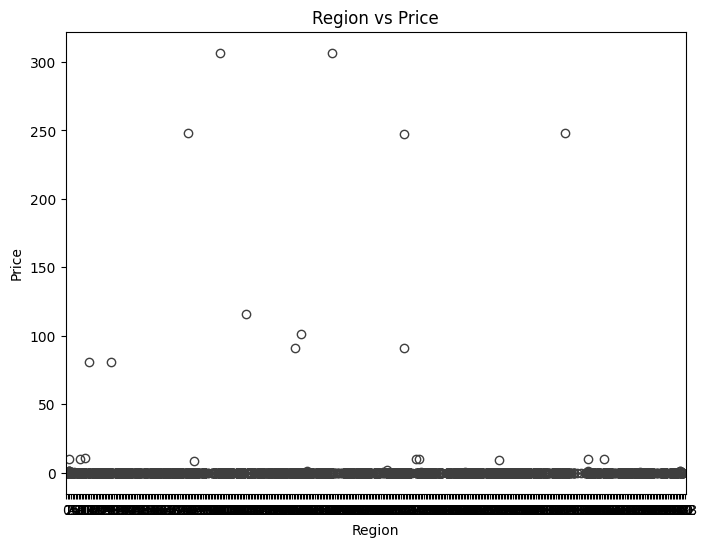

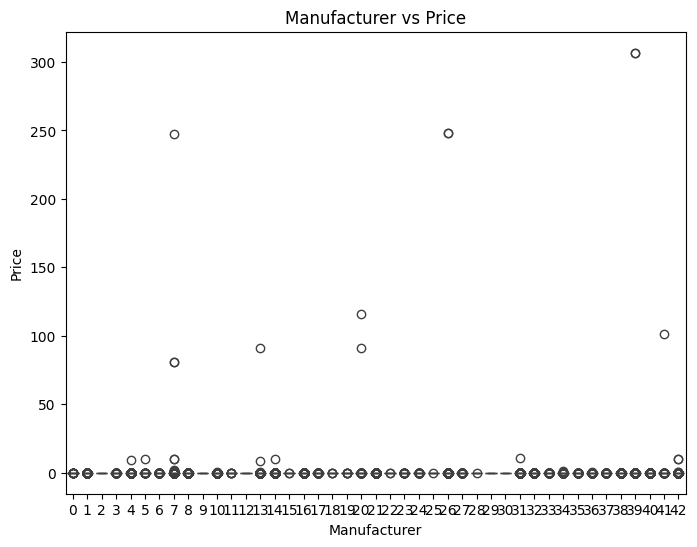

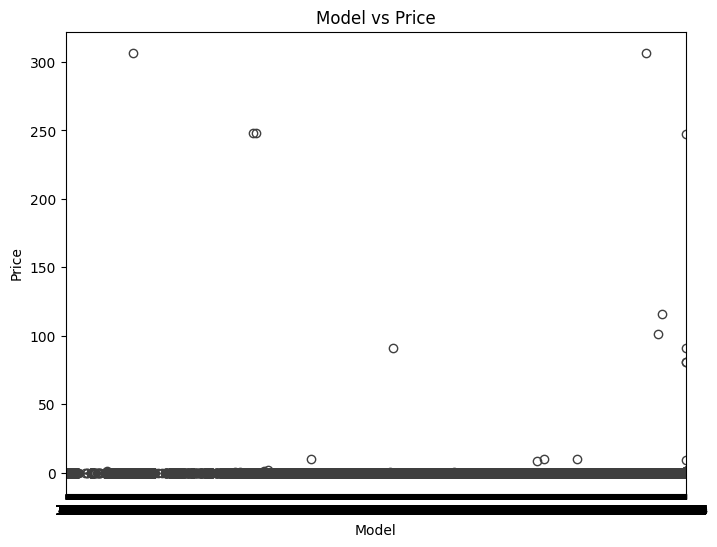

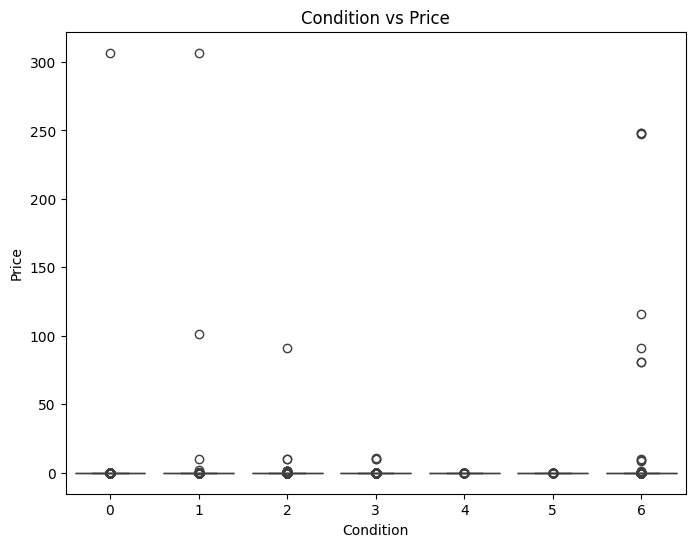

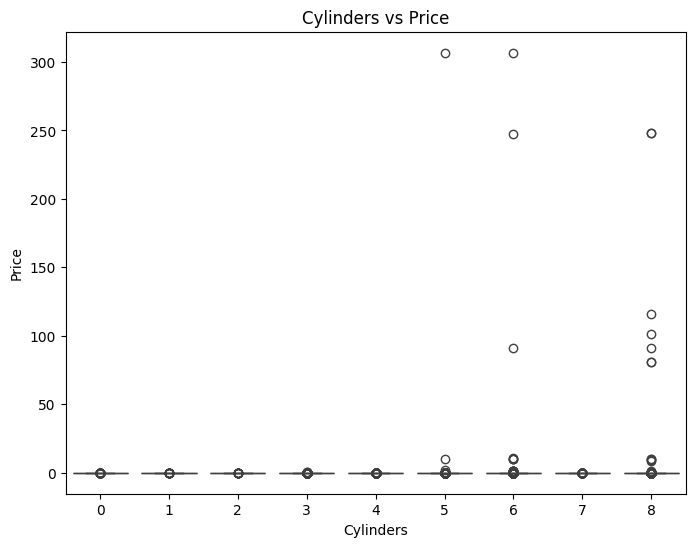

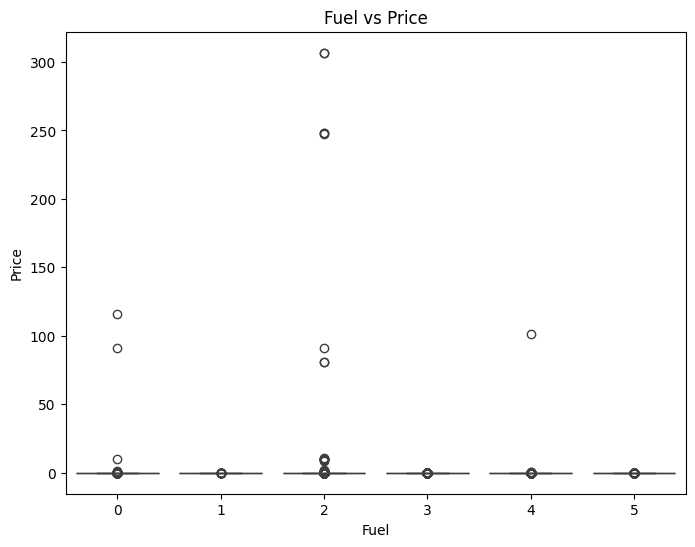

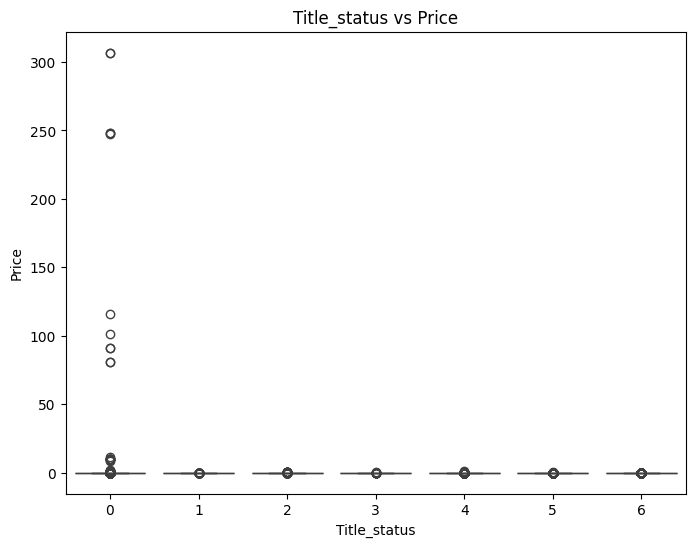

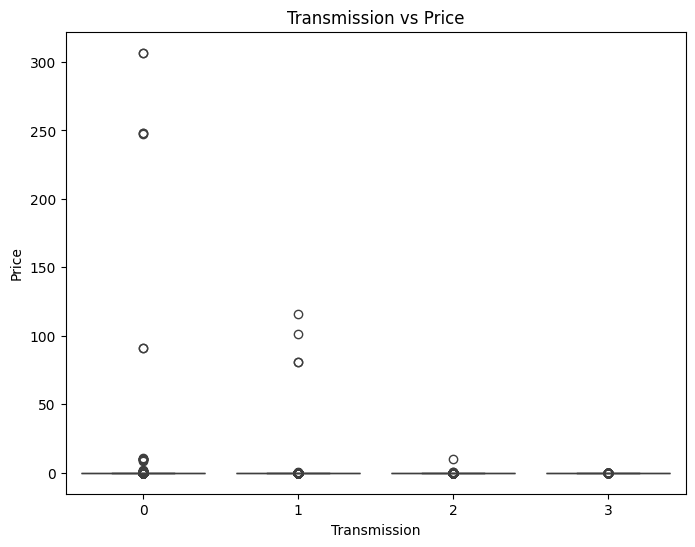

In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler


# Encode categorical variables
label_encoders = {}
for column in df.columns:
    if df[column].dtype == 'object':
        label_encoders[column] = LabelEncoder()
        df[column] = label_encoders[column].fit_transform(df[column])

# Scale numerical variables
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Plot histograms of scaled numerical features
df[numerical_columns].hist(figsize=(12, 10), bins=20)
plt.suptitle('Histograms of Scaled Numerical Features', fontsize=16)
plt.show()

# Plot boxplots of encoded categorical features vs. price
for column in label_encoders.keys():
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[column], y=df['price'])
    plt.title(f'{column.capitalize()} vs Price')
    plt.xlabel(column.capitalize())
    plt.ylabel('Price')
    plt.show()


In [ ]:
# Count missing values in each column
missing_values_count = df_new.isnull().sum()

# Print the count of missing values in each column
print("Missing values in each column:")
print(missing_values_count)


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [ ]:
df_new=df[(df['price']> 200000) & (df['price']< 400000)]

In [ ]:
df_new['price'].max()

In [ ]:
from sklearn.impute import SimpleImputer

from sklearn.preprocessing import StandardScaler




# Impute missing values in numerical columns with median
num_imputer = SimpleImputer(strategy='median')
numerical_cols = df_new.select_dtypes(include=['int', 'float']).columns
df_new[numerical_cols] = num_imputer.fit_transform(df_new[numerical_cols])

# Impute missing values in categorical columns with mode
cat_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols = df_new.select_dtypes(include=['object']).columns
df_new[categorical_cols] = cat_imputer.fit_transform(df_new[categorical_cols])


In [ ]:
#df_new.sort_values(by='odometer')

In [38]:
'''from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  
df_new.loc[:, 'odometer'] = scaler.fit_transform(df_new[['odometer']])

print(df_new['odometer'].max())
print(df_new['odometer'].min())'''

6.992063511924283
-0.24837940527705415


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Summary statistics
print(df_new.describe())

# Histograms for numerical variables
numerical_columns = df_new.select_dtypes(include=['float64', 'int64']).columns
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_new[column], bins=20, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

# Scatter plots for numerical variables
plt.figure(figsize=(8, 4))
sns.pairplot(df_new[numerical_columns])
plt.title('Pairplot of Numerical Variables')
plt.show()

# Correlation matrix
correlation_matrix = df_new.corr()
plt.figure(figsize=(8, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [26]:
# Calculate age of the vehicle by subtracting the year from the current year
current_year = 2024  # Assuming the current year is 2024
df_new['vehicle_age'] = current_year - df_new['year']

# Display the first few rows of the DataFrame to verify the new feature
print(df_new.head())


                 id              region     price    year manufacturer  \
8495   7.316222e+09  flagstaff / sedona  213000.0  1933.0         ford   
8901   7.310125e+09  flagstaff / sedona  229500.0  2018.0      ferrari   
9080   7.306379e+09  flagstaff / sedona  229500.0  2019.0      ferrari   
14950  7.314852e+09              tucson  239995.0  2017.0      ferrari   
16684  7.310898e+09              tucson  239995.0  2017.0      ferrari   

                  model  condition    cylinders fuel  odometer title_status  \
8495      2 dr victoria  excellent  8 cylinders  gas  6.992064        clean   
8901         488 spider  excellent  8 cylinders  gas -0.191122      salvage   
9080   Lamborghini Urus  excellent  8 cylinders  gas -0.010023        clean   
14950           488 gtb  excellent  8 cylinders  gas -0.201693        clean   
16684           488 gtb  excellent  8 cylinders  gas -0.204864        clean   

      transmission                VIN drive         size         type  \
8495   

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_37280\3345091660.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new['vehicle_age'] = current_year - df_new['year']


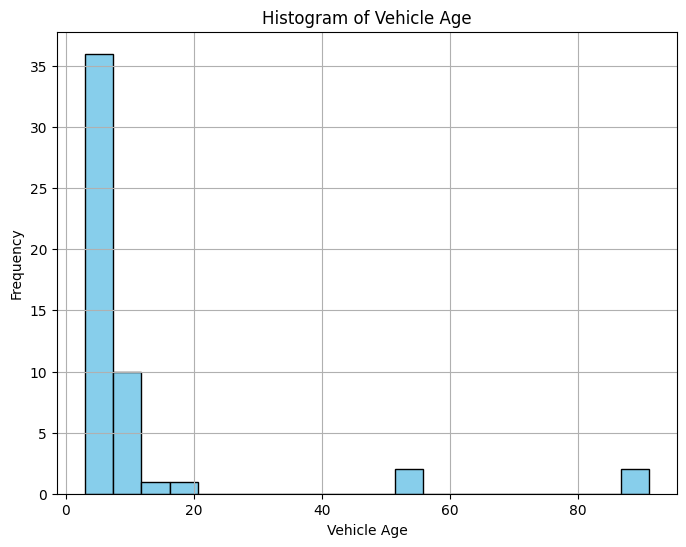

In [27]:
import matplotlib.pyplot as plt

# Plot histogram of vehicle_age
plt.figure(figsize=(8, 6))
plt.hist(df_new['vehicle_age'], bins=20, color='skyblue', edgecolor='black')
plt.xlabel('Vehicle Age')
plt.ylabel('Frequency')
plt.title('Histogram of Vehicle Age')
plt.grid(True)
plt.show()



In [8]:
from sklearn.preprocessing import MinMaxScaler

num_cols = df_new.select_dtypes(include=['int64', 'float64']).columns.drop('id')
cat_cols = df_new.select_dtypes(include=['object'])

scaler =  MinMaxScaler()
df_new[num_cols] =scaler.fit_transform(df_new[num_cols])

for col in cat_cols:
    df_new[col] = df_new[col].astype('category').cat.codes

C:\Users\Sohaa\AppData\Local\Temp\ipykernel_36732\2551405613.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new[num_cols] =scaler.fit_transform(df_new[num_cols])


### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression  
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt


X = df_new.drop(['id','price'], axis=1)
y = df_new['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

line_reg = LinearRegression()

line_reg.fit(X_train , y_train)

y_pred = line_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:", mse)

Mean Squared Error: 0.04254728253312454


In [10]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [11]:
dt_reg = DecisionTreeRegressor()
dt_reg.fit(X_train, y_train)
dt_reg_score = dt_reg.score(X_test, y_test)
dt_reg_mse = mean_squared_error(y_test, dt_reg.predict(X_test))
print("Mean Squared Error:", dt_reg_mse)

Mean Squared Error: 0.0003154947184088218


In [12]:
rf_reg = RandomForestRegressor()
rf_reg.fit(X_train, y_train)
rf_reg_score = rf_reg.score(X_test, y_test)
rf_reg_mse = mean_squared_error(y_test, rf_reg.predict(X_test))
print("Mean Squared Error:", rf_reg_mse)

Mean Squared Error: 0.014800266951301705


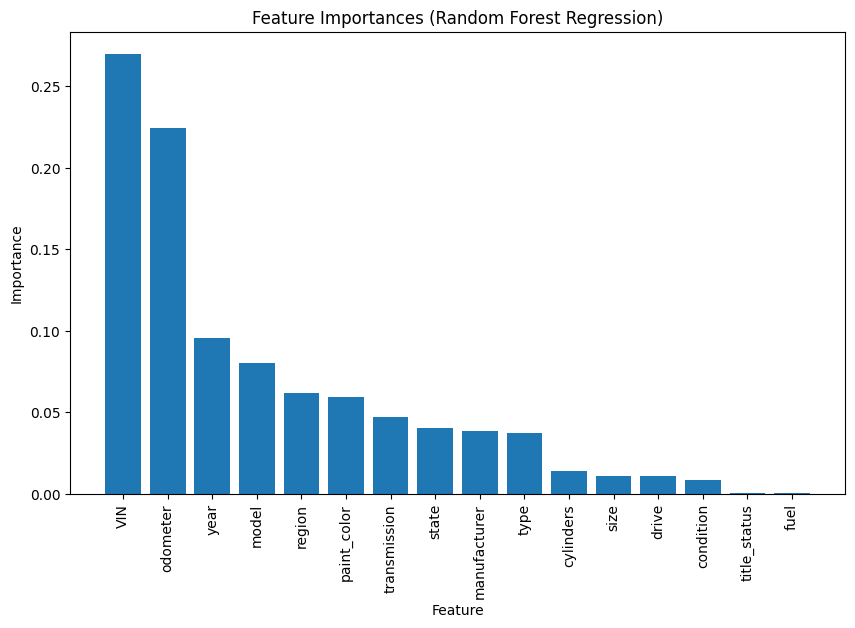

In [13]:
import numpy as  np
# Visualize feature importances
feature_names = X.columns
feature_importances = rf_reg.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Random Forest Regression)')
plt.show()

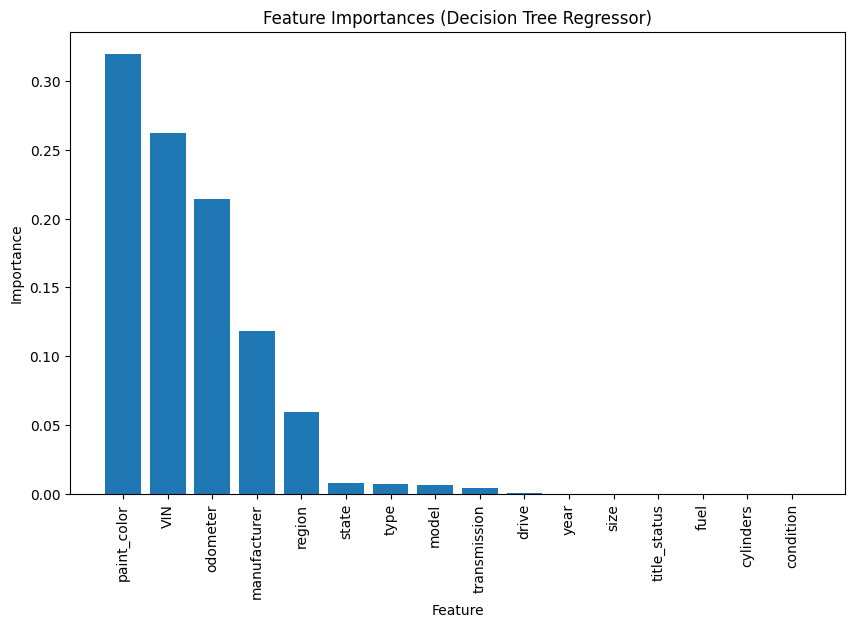

In [14]:
feature_names = X.columns
feature_importances = dt_reg.feature_importances_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (Decision Tree Regressor)')
plt.show()

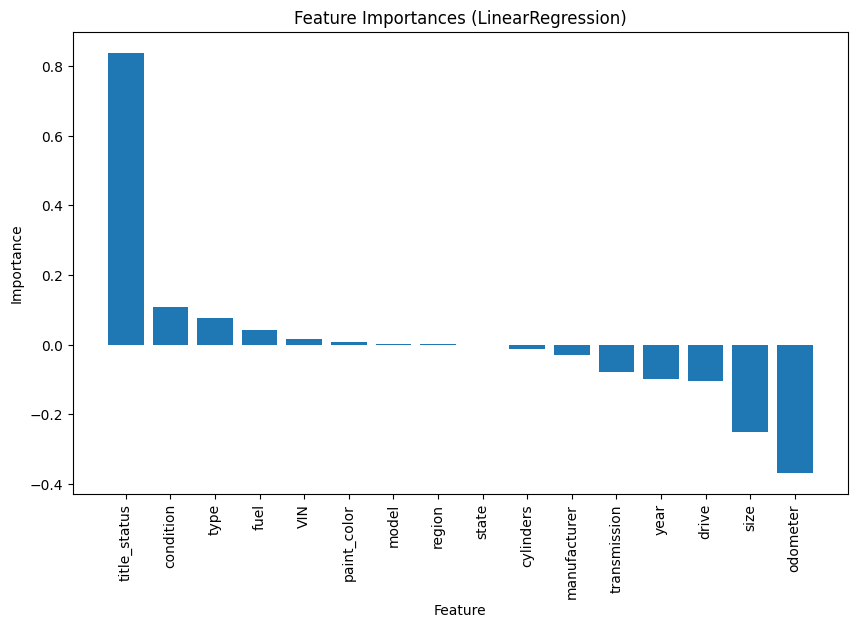

In [15]:
feature_names = X.columns
feature_importances = line_reg.coef_
sorted_indices = np.argsort(feature_importances)[::-1]

plt.figure(figsize=(10, 6))
plt.bar(range(len(feature_names)), feature_importances[sorted_indices])
plt.xticks(range(len(feature_names)), [feature_names[i] for i in sorted_indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances (LinearRegression)')
plt.show()

### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

During the evaluation phase, I delved into the effectiveness of our trained regression models, employing the mean squared error (MSE) metric as our yardstick for evaluation. Notably, our analysis revealed that the decision tree model showcased commendable performance in its ability to predict car prices accurately. This finding underscores the reliability and robustness of the decision tree algorithm in capturing the complex relationships inherent in our dataset, thus offering promising prospects for practical application in pricing strategies within the used car market.

### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.